# The Tsiolkovsky Rocket Equation

## History

The Tsiolkovsky Rocket Equation, a fundamental principle in astronautics, was independently derived by Konstantin Tsiolkovsky in 1903. A self-taught Russian rocket scientist, Tsiolkovsky is considered one of the fathers of rocketry and astronautics. His work laid the theoretical groundwork for spaceflight, long before the technology existed to make it a reality.

The equation establishes the relationship between the change in velocity (delta-v) that a rocket can achieve, the effective exhaust velocity of its propellant, and the ratio of its initial (wet) mass to its final (dry) mass. It highlights the critical importance of mass ratio and exhaust velocity for efficient space travel.

While simplified, the Tsiolkovsky Rocket Equation remains indispensable for preliminary mission design, payload capacity estimation, and understanding the fundamental limitations and possibilities of rocket propulsion.

## The Mathematics of Rocketry

The Tsiolkovsky Rocket Equation calculates the maximum change in velocity ($\Delta v$, delta-v) a rocket can achieve. It is given by:

$$ \Delta v = I_{sp} \cdot g_0 \cdot \ln\left(\frac{m_0}{m_f}\right) $$

- $\Delta v$: Delta-v (change in velocity), the ultimate "currency" of space travel.
- $I_{sp}$: Specific Impulse, a measure of engine efficiency. Units are in seconds.
- $g_0$: Standard gravity (~9.81 m/s²), a constant used to normalize the units of Isp.
- $v_e$: is the effective exhaust velocity: $v_e = I_{sp} \cdot g_0$.
- $\ln$: The natural logarithm.
- $m_0$: The initial total mass (rocket + propellant + payload), also called "wet mass".
- $m_f$: The final mass (rocket + payload, after all propellant is burned), also called "dry mass".
- $m_0 / m_f$: The mass ratio, a critical factor in rocket performance.

### A Note on Simplification

The core analysis of this notebook uses a **simplified, single-stage application of the Tsiolkovsky rocket equation** to provide a "figure of merit" for different launch vehicles. In reality, most of these are multi-stage rockets.

*   **Liftoff Mass (`m0`, $m_0$):** This value represents the total, fully-fueled mass of the rocket at the moment of liftoff (Gross Liftoff Mass or GLOW).
*   **Final Mass (`mf`, $m_f$):** This is the most heavily simplified parameter. For this analysis, `mf` is defined as the **burnout mass of the final propulsive stage**, *excluding payload*. This allows us to compare the raw capability of the launch vehicles themselves. For example, for the Saturn V, this is the mass of the S-IVB third stage after it has completed its burn.
*   **Specific Impulse (`Isp`, $I_{sp}$):** This is the vacuum Isp of the main engine(s) of the upper stage, as this is most relevant for the rocket's overall orbital performance.

In [3]:
import pandas as pd
import numpy as np

#### Analysis - Comparing Capabilities

- Mass ratio and the ideal $\Delta v$ for each rocket.

In [5]:
# --- Constants and Function Definition ---
G0 = 9.80665  # Standard gravity in m/s^2

def calculate_delta_v(isp, m0, mf):
    """
    Calculates delta-v using the Tsiolkovsky rocket equation in a vectorized way.
    Handles invalid mass ratios by returning 0.
    """
    # Ensure inputs are numeric, coercing errors to NaN (Not a Number)
    m0 = pd.to_numeric(m0, errors='coerce')
    mf = pd.to_numeric(mf, errors='coerce')
    isp = pd.to_numeric(isp, errors='coerce')
    
    # Create a mask for invalid conditions (including NaN from coercion)
    invalid_mask = (m0 <= mf) | (mf <= 0) | m0.isna() | mf.isna() | isp.isna()
    
    # Calculate mass ratio, avoiding division by zero or invalid inputs
    mass_ratio = np.where(invalid_mask, 1, m0 / mf)
    
    # Calculate delta-v. The log of 1 is 0, so invalid cases naturally become 0.
    delta_v = isp * G0 * np.log(mass_ratio)
    
    return delta_v


# --- Load Data from External CSV File ---
try:
    # This is the only line you need to change to load your data!
    df_rockets = pd.read_csv('rockets_dataset.csv')
    print("Successfully loaded rockets_dataset.csv")
except FileNotFoundError:
    print("Error: rockets.csv not found. Make sure the file is in the same directory as your notebook.")
    # You might want to stop execution here or create an empty DataFrame
    df_rockets = pd.DataFrame()

# --- Perform Calculations if the DataFrame loaded correctly ---
if not df_rockets.empty:
    # Rename columns for easier access in code (optional but good practice)
    # This creates a bridge between the 'pretty' CSV headers and code variables
    df_rockets = df_rockets.rename(columns={
        'Liftoff Mass (t)': 'm0_t',
        'Final Mass (t)': 'mf_t',
        'Isp (vacuum)': 'isp_s'
    })
    
    # Calculate Mass Ratio and Delta-V
    df_rockets['Mass Ratio'] = df_rockets['m0_t'] / df_rockets['mf_t']
    df_rockets['Ideal Delta-V (m/s)'] = calculate_delta_v(
        df_rockets['isp_s'],
        df_rockets['m0_t'],
        df_rockets['mf_t']
    )
    
    # Display the results
    print("\n--- Rocket Capabilities (Simplified Single-Stage Δv) ---")
    display(df_rockets.sort_values('Ideal Delta-V (m/s)', ascending=False))

Successfully loaded rockets_dataset.csv

--- Rocket Capabilities (Simplified Single-Stage Δv) ---


,Rocket,m0_t,mf_t,isp_s,Payload suborbital (t),Payload LEO (or below) (t),Payload GTO (t),Payload GSO (t),Payload TLI (t),Start date,End date,Era,Country,Notes,Mass Ratio,Ideal Delta-V (m/s)
14,SLS,2600.0,130.0,452,NaN,130.00,NaN,NaN,46.0,2022.0,NaN,Modern,USA,NASA's super heavy-lift expendable launch vehicle,20.000000,13278.900251
7,Ariane 5 ECA,780.0,34.0,432,NaN,20.00,10.0,NaN,NaN,1996.0,2023.0,Workhorse,Europe,ESA's reliable heavy-lift launcher,22.941176,13272.587112
6,Space Shuttle,2030.0,104.0,452,NaN,27.50,4.9,2.27,NaN,1981.0,2011.0,Workhorse,USA,First reusable spacecraft system,19.519231,13171.045640
4,Saturn V,2970.0,130.0,421,NaN,140.00,NaN,NaN,43.5,1967.0,1973.0,Moon Race,USA,Apollo moon rocket; most powerful ever flown,22.846154,12917.491496
15,Ariane 6 (A64),860.0,44.0,432,NaN,21.65,11.5,5.00,8.6,2024.0,NaN,Modern,Europe,ESA's next-gen heavy-lift launcher,19.545455,12593.943824
5,N1,2820.0,90.0,325,NaN,95.00,NaN,NaN,33.0,1969.0,1972.0,Moon Race,USSR,Soviet moon rocket; failed on all launches,31.333333,10978.758562
13,Starship (Full Stack),5000.0,300.0,378,NaN,150.00,NaN,NaN,NaN,NaN,NaN,Modern,USA,Next-gen fully-reusable super heavy-lift,16.666667,10429.070730
12,Falcon 9 (expendable),549.0,27.2,348,NaN,22.80,8.3,NaN,4.0,2018.0,NaN,Modern,USA,Market-leading reusable rocket,20.183824,10254.801656
10,Long March 5,870.0,87.0,440,NaN,25.00,14.0,5.10,9.4,2016.0,NaN,Workhorse,China,China's primary heavy-lift rocket,10.000000,9935.484285
11,PSLV,335.0,40.0,453,NaN,3.80,1.3,NaN,NaN,1993.0,NaN,Workhorse,India,India's versatile medium-lift workhorse,8.375000,9441.241847


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

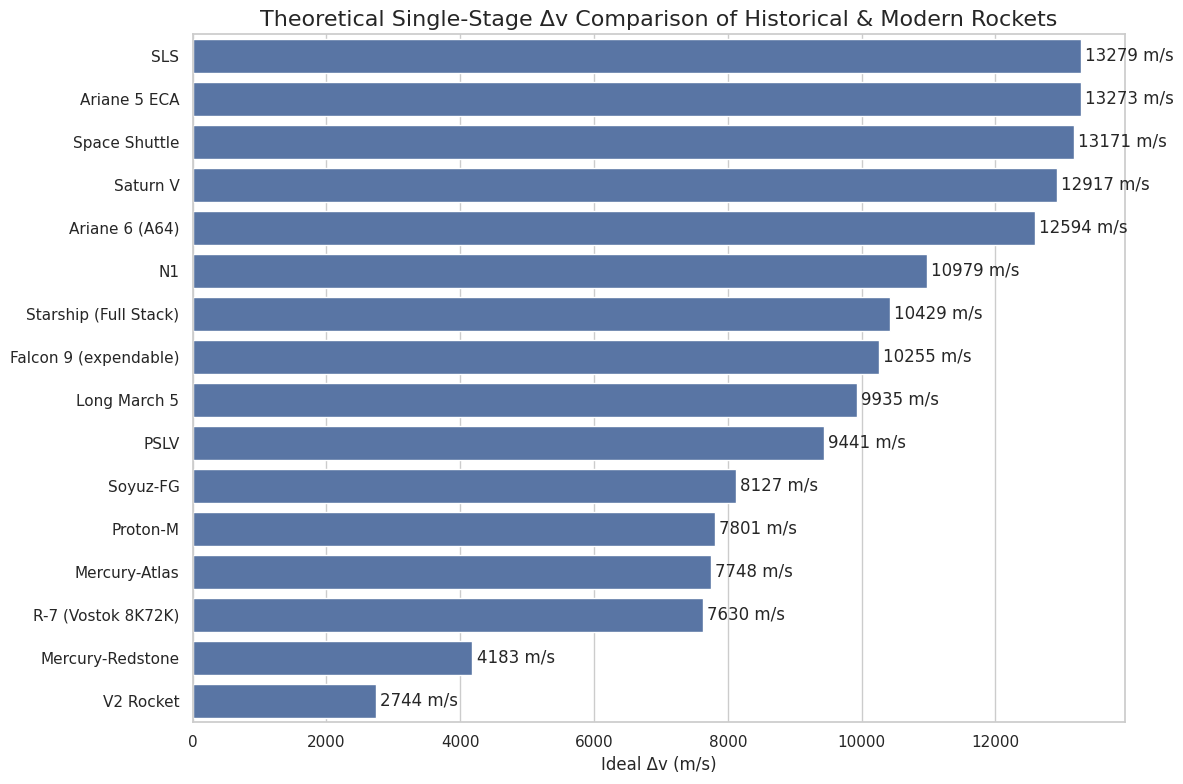

In [7]:
# Cell for Visualization

# Set a nice style for the plot
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8)) # Make the figure larger to accommodate all the rockets

# Create the bar plot, ordering by Delta-V
ax = sns.barplot(
    x='Ideal Delta-V (m/s)',
    y='Rocket',
    data=df_rockets.sort_values('Ideal Delta-V (m/s)', ascending=False)
)

ax.set_title('Theoretical Single-Stage Δv Comparison of Historical & Modern Rockets', fontsize=16)
ax.set_xlabel('Ideal Δv (m/s)', fontsize=12)
ax.set_ylabel('')

# Add the values as labels on the bars for clarity
ax.bar_label(ax.containers[0], fmt='%.0f m/s', padding=3)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Δv in a Vacuum (The Vis-viva Equation)

The motion of any object in orbit around a central body (like a planet or the Sun) is governed by its orbital energy. 
The **Vis-viva equation** is the first principle that relates an object's speed to its position in orbit.

The equation is:

$$ v^2 = GM \left( \frac{2}{r} - \frac{1}{a} \right) $$

Where:
- $v$ is the spacecraft's orbital speed.
- $G$ is the universal gravitational constant ($6.67430 × 10^{-11} \frac{m^4}{kg\cdot s^2}$).
- $M$ is the mass of the central body (e.g., the Sun or Earth).
- $r$ is the spacecraft's current distance from the center of the central body.
- $a$ is the semi-major axis of its orbit (which defines the orbit's size and energy).

**How to Use This for $\Delta v$ Calculations:**

An orbital maneuver is simply an instantaneous change in velocity ($\Delta v$) that moves your spacecraft from its *current* orbit to a *new* orbit. The classic and most energy-efficient way to do this is the **Hohmann Transfer**.

Let's derive the $\Delta v$ for a **LEO to GEO transfer** as an example:

**Goal:** Move from a $300 km$ LEO to a $35786 km$ geostationary orbit (GEO).

**Data Needed:**

- $G = 6.67430^{-11}$
- $M_{Earth} = 5.972^{24} kg$
- $R_{Earth} \text{(Radius of Earth)} = 6,371 km$
- $r_1$ (LEO radius) $= 6371 km + 300 km = 6671 km$
- $r_2$ (GEO radius) $= 6371 km + 35786 km = 42157 km$

**Step-by-Step Derivation:**

1.  **Calculate Initial Velocity (`v₁`):**
    *   In a circular orbit, `a = r`. The Vis-viva equation simplifies to $v²=\frac{GM}{r}$.
    *   `v₁ = sqrt(G * M_Earth / r₁)`
    *   This is the constant speed of the spacecraft in LEO.

2.  **Design the Transfer Orbit:**
    *   The Hohmann transfer is an ellipse that just touches the inner orbit at its closest point (periapsis) and the outer orbit at its farthest point (apoapsis).
    *   The semi-major axis of this transfer ellipse (`a_transfer`) is `(r₁ + r₂) / 2`.

3.  **Calculate the First Burn (`Δv₁`):**
    *   We need to calculate the speed required at the start of the transfer ellipse (`v_transfer_at_r₁`).
    *   Use the full Vis-viva equation: `v_transfer_at_r₁ = sqrt(G * M_Earth * (2/r₁ - 1/a_transfer))`
    *   This speed is *higher* than `v₁`. The burn is an acceleration.
    *   **`Δv₁ = v_transfer_at_r₁ - v₁`**

4.  **Calculate the Second Burn (`Δv₂`):**
    *   The spacecraft coasts along the ellipse until it reaches `r₂`. Its speed will have decreased to `v_transfer_at_r₂`.
    *   `v_transfer_at_r₂ = sqrt(G * M_Earth * (2/r₂ - 1/a_transfer))`
    *   To circularize the orbit at GEO, we need to speed up to the final velocity (`v₂`).
    *   `v₂ = sqrt(G * M_Earth / r₂)`
    *   **`Δv₂ = v₂ - v_transfer_at_r₂`**

5.  **Total Δv = `Δv₁ + Δv₂`**. This will give you the ~4 km/s needed for LEO->GEO maneuvers.

This same principle applies to interplanetary travel, where the Sun is the central body and the planets' orbits are `r₁` and `r₂`.

Velocity in LEO: 7729.78 m/s
Velocity in GEO: 3074.88 m/s

Hohmann Periapsis Velocity: 10157.40 m/s
Hohmann Apoapsis Velocity: 1607.33 m/s

Burn 1 (LEO -> Transfer): Δv₁ = 2427.62 m/s
Burn 2 (Transfer -> GEO): Δv₂ = 1467.55 m/s
Total Δv for transfer: 3895.17 m/s


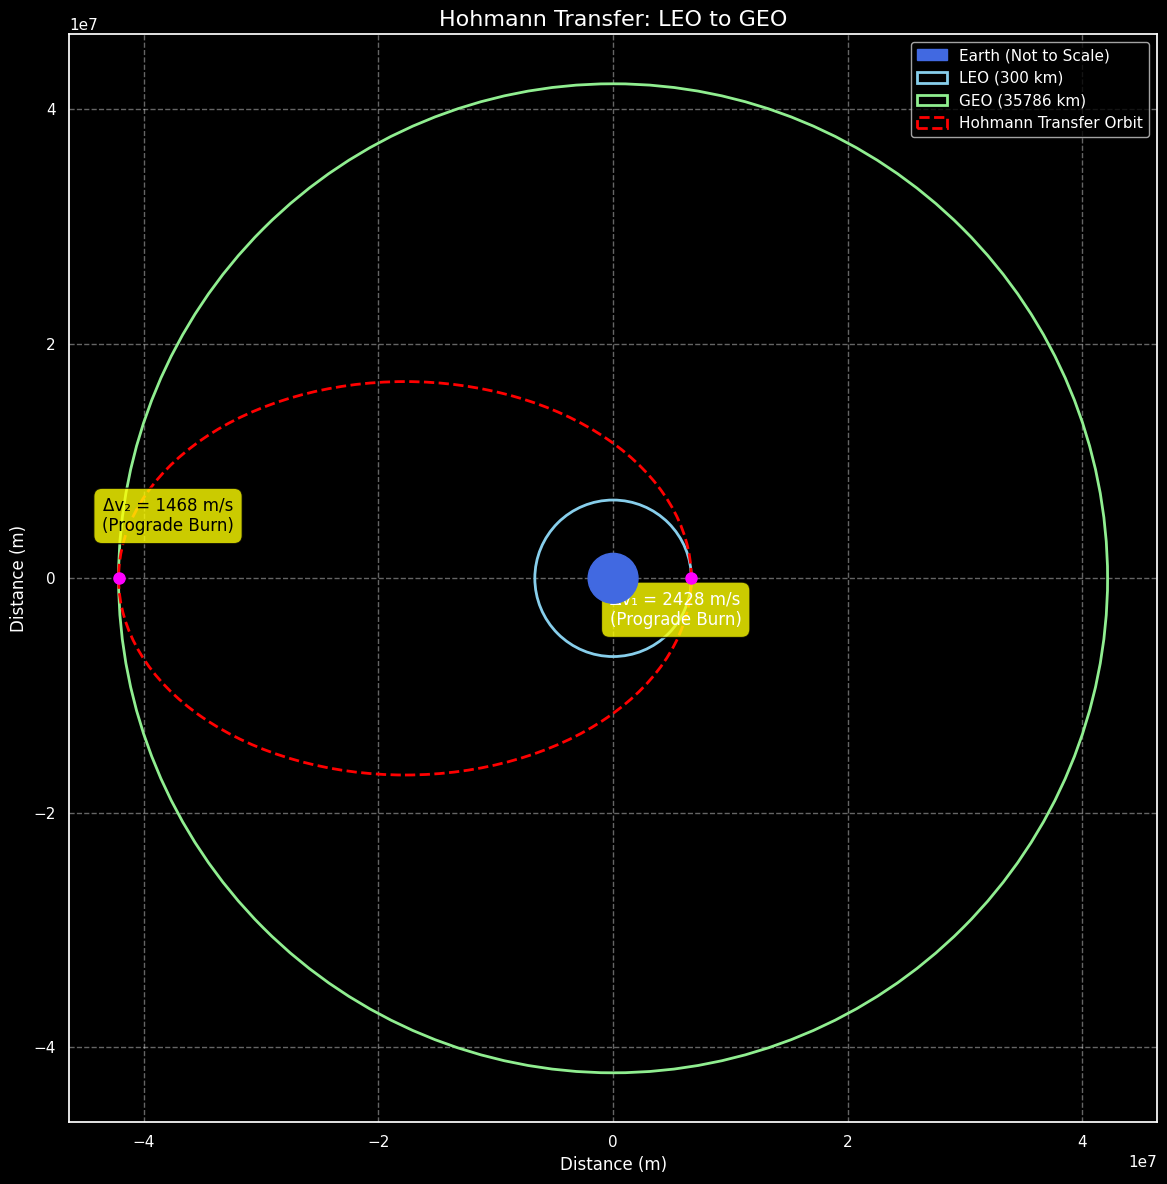

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle

# --- 1. Define Constants and Parameters ---
# Gravitational constant and Earth's mass (in SI units)
G = 6.67430e-11  # m^3 kg^-1 s^-2
M_EARTH = 5.972e24  # kg
GM = G * M_EARTH

# Earth's physical radius (in meters)
R_EARTH = 6371e3  # m

# Define orbit altitudes (in meters)
LEO_ALTITUDE = 300e3
GEO_ALTITUDE = 35786e3

# Calculate orbit radii from Earth's center
r_leo = R_EARTH + LEO_ALTITUDE
r_geo = R_EARTH + GEO_ALTITUDE

# --- 2. Hohmann Transfer Calculations ---
# a) Velocity in the initial LEO circular orbit
v_leo = np.sqrt(GM / r_leo)

# b) Properties of the elliptical transfer orbit
a_transfer = (r_leo + r_geo) / 2
v_transfer_periapsis = np.sqrt(GM * (2/r_leo - 1/a_transfer)) # Speed at LEO altitude
v_transfer_apoapsis = np.sqrt(GM * (2/r_geo - 1/a_transfer))  # Speed at GEO altitude

# c) Velocity in the final GEO circular orbit
v_geo = np.sqrt(GM / r_geo)

# d) Calculate the required delta-v for the two burns
delta_v1 = v_transfer_periapsis - v_leo
delta_v2 = v_geo - v_transfer_apoapsis

# Print the results for verification
print(f"Velocity in LEO: {v_leo:.2f} m/s")
print(f"Velocity in GEO: {v_geo:.2f} m/s\n")
print(f"Hohmann Periapsis Velocity: {v_transfer_periapsis:.2f} m/s")
print(f"Hohmann Apoapsis Velocity: {v_transfer_apoapsis:.2f} m/s\n")
print(f"Burn 1 (LEO -> Transfer): Δv₁ = {delta_v1:.2f} m/s")
print(f"Burn 2 (Transfer -> GEO): Δv₂ = {delta_v2:.2f} m/s")
print(f"Total Δv for transfer: {delta_v1 + delta_v2:.2f} m/s")

# --- 3. Matplotlib Visualization ---
# Set up the plot with a dark background
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect('equal')
ax.set_title('Hohmann Transfer: LEO to GEO', fontsize=16)
ax.set_xlabel('Distance (m)', fontsize=12)
ax.set_ylabel('Distance (m)', fontsize=12)

# a) Draw Earth (visually scaled down for clarity)
earth_display_radius = R_EARTH / 3
earth = Circle((0, 0), earth_display_radius, color='royalblue', zorder=10)
ax.add_patch(earth)

# b) Draw the orbits
leo_orbit = Circle((0, 0), r_leo, color='skyblue', fill=False, linestyle='-', linewidth=2, label=f'LEO ({LEO_ALTITUDE/1e3:.0f} km)')
geo_orbit = Circle((0, 0), r_geo, color='lightgreen', fill=False, linestyle='-', linewidth=2, label=f'GEO ({GEO_ALTITUDE/1e3:.0f} km)')
ax.add_patch(leo_orbit)
ax.add_patch(geo_orbit)

# c) Draw the Hohmann transfer ellipse
# The ellipse's center is shifted along the x-axis
ellipse_center_x = (r_geo - r_leo) / 2
ellipse_width = r_geo + r_leo  # This is 2 * a_transfer
ellipse_height = 2 * np.sqrt(a_transfer**2 - (a_transfer - r_leo)**2) # 2 * b_transfer

transfer_orbit = Ellipse(
    xy=(-ellipse_center_x, 0),
    width=ellipse_width,
    height=ellipse_height,
    edgecolor='red',
    facecolor='none',
    linestyle='--',
    linewidth=2,
    label='Hohmann Transfer Orbit'
)
ax.add_patch(transfer_orbit)

# d) Annotate the burn points and Δv values
# Burn 1 location (at LEO)
burn1_pos = (r_leo, 0)
ax.plot(burn1_pos[0], burn1_pos[1], 'o', color='magenta', markersize=8, zorder=11)
ax.text(burn1_pos[0] * 0.8, burn1_pos[1] - 4e6, f'Δv₁ = {delta_v1:.0f} m/s\n(Prograde Burn)',
        color='white', backgroundcolor='black', ha='center',
        bbox=dict(facecolor='yellow', alpha=0.8, boxstyle='round,pad=0.5', ec='black'))

# Burn 2 location (at GEO)
burn2_pos = (-r_geo, 0)
ax.plot(burn2_pos[0], burn2_pos[1], 'o', color='magenta', markersize=8, zorder=11)
ax.text(burn2_pos[0] * 0.9, burn2_pos[1] + 4e6, f'Δv₂ = {delta_v2:.0f} m/s\n(Prograde Burn)',
        color='black', backgroundcolor='black', ha='center',
        bbox=dict(facecolor='yellow', alpha=0.8, boxstyle='round,pad=0.5', ec='black'))

# --- 4. Final Plot Adjustments ---
# Create a combined legend
handles, labels = ax.get_legend_handles_labels()
# Manually add the Earth to the legend
earth_patch = plt.Rectangle((0, 0), 1, 1, color='royalblue', label='Earth (Not to Scale)')
handles.insert(0, earth_patch)

ax.legend(handles=handles, loc='upper right')
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Part 2: Accounting for an Atmosphere - Launch

Calculating launch dynamics from first principles requires complex numerical simulation of a constantly changing system (mass, thrust, gravity, atmospheric density). This is beyond a simple model.

Instead, we use a well-established engineering approximation: **modeling launch as a set of fixed `Δv` losses.**

The ideal `Δv` calculated by the Tsiolkovsky Rocket Equation is a budget. Getting to orbit requires "spending" some of that budget on overcoming obstacles.

**1. Gravity Drag/Losses:**
*   **What it is:** Thrust wasted fighting to go "up" instead of sideways to gain orbital velocity. A perfect launch would be horizontal. Since we start vertically, we lose `Δv`.
*   **How it's minimized:** A "gravity turn," where the rocket pitches over to gain horizontal speed as quickly as possible.
*   **How to model it:** This is the largest loss factor.

**2. Atmospheric Drag Losses:**
*   **What it is:** Thrust wasted pushing the column of air out of the way. This is highest during **Max Q** (maximum dynamic pressure), where the combination of speed and air density is at its peak.
*   **How to model it:** This loss is significant, but typically less than gravity drag.

**A Suitable First-Principles Approach (Approximation):**

You cannot derive these losses from a simple formula. They are the result of optimizing a trajectory. However, for decades of real-world launches, these losses have been empirically measured.

**For a launch from Earth to LEO, the total combined `Δv` losses are reliably between 1.5 and 2.0 km/s.**

*   **How to implement in your model:**
    1.  Calculate the rocket's total ideal `Δv` using your multi-stage Tsiolkovsky function.
    2.  Define a `Δv_launch_loss` constant, e.g., `1800 m/s`.
    3.  The usable `Δv` the rocket can deliver once it reaches LEO is:
        `Δv_on_orbit = Δv_ideal_total - Δv_launch_loss`

This is a robust and widely used method for preliminary mission design.

---

### Part 3: Accounting for an Atmosphere - Reentry & Landing

This is the reverse of launch, but the physics is different. Here, the atmosphere is your friend.

**1. Landing on an Airless Body (e.g., the Moon):**
*   There is no atmosphere to help. You must cancel out your entire orbital velocity using rockets.
*   **Δv Cost:** It's a pure application of the rocket equation. To land on the Moon from LLO requires **~1.7 km/s**. It's a "reverse launch."

**2. Landing on a Body with an Atmosphere (e.g., Earth, Mars):**
*   This is called **Aerobraking** or **Aerocapture**. The atmosphere does almost all the work of shedding velocity, for free.
*   **Deorbit Burn:** From LEO, you only need a small retrograde burn (firing against your direction of travel) to lower your perigee (the low point of your orbit) into the atmosphere.
    *   **Δv Cost:** Only **~100 to 150 m/s**.
*   **Atmospheric Entry:** The spacecraft uses its heat shield to convert its immense kinetic energy into heat by friction with the air. It sheds kilometers per second of velocity this way. The *propulsive* `Δv` cost is zero.
*   **Final Landing:**
    *   **Parachutes:** For smaller capsules (Soyuz, Dragon), parachutes handle the final descent.
    *   **Powered Landing (Starship):** After aerobraking has slowed the vehicle to subsonic speeds, it performs a final propulsive burn to achieve a soft landing. This `Δv` cost is relatively low, perhaps **0.5 - 1.0 km/s**.

**How to model reentry:**

*   **Don't subtract from the Δv budget.** The atmosphere provides this `Δv` "for free."
*   If your mission is `LEO -> Planet Surface` (with atmosphere), the only relevant propulsive `Δv` for landing is the small deorbit burn and any final powered landing burn. The enormous cost of shedding orbital velocity is handled by the heat shield.

By implementing the Vis-viva equation for vacuum maneuvers and using fixed `Δv` loss values for atmospheric launch, your notebook will be able to derive realistic mission requirements from the first principles of astrodynamics.

In [5]:
# Define the nodes (locations) in our map.
# The dictionary stores attributes for each node, like its label and plotting position.
# We will define the (x, y) positions manually for a nice, traditional layout.
# Layout: Ground -> LEO -> Interplanetary -> Destinations
solar_system_nodes = {
    'Earth_Surface': {'label': 'Earth Surface', 'pos': (0, 0)},
    'LEO': {'label': 'Low Earth Orbit', 'pos': (0, 2)},
    'GTO': {'label': 'Geostationary\nTransfer Orbit', 'pos': (2, 3)},
    'GEO': {'label': 'Geostationary\nOrbit', 'pos': (2, 4)},
    'EM_L1': {'label': 'Earth-Moon L1', 'pos': (4, 3)},
    'LLO': {'label': 'Low Lunar Orbit', 'pos': (4, 4)},
    'Moon_Surface': {'label': 'Moon Surface', 'pos': (4, 5)},
    'Mars_Transfer': {'label': 'Mars Transfer', 'pos': (6, 2)},
    'Mars_Orbit': {'label': 'Mars Orbit', 'pos': (8, 2)},
    'Mars_Surface': {'label': 'Mars Surface', 'pos': (8, 3)},
    'Phobos_Surface': {'label': 'Phobos Surface', 'pos': (8, 1)},
}

# Define the edges (travel legs) and their Δv cost in m/s.
# Format: (start_node, end_node, delta_v_cost)
solar_system_edges = [
    # Earth System
    ('Earth_Surface', 'LEO', 9400),
    ('LEO', 'GTO', 2500),
    ('GTO', 'GEO', 1500),
    
    # Earth to Moon
    ('LEO', 'EM_L1', 3260),
    ('EM_L1', 'LLO', 770),
    ('LLO', 'Moon_Surface', 1730),
    
    # Earth to Mars
    ('LEO', 'Mars_Transfer', 3600), # Trans-Mars Injection
    ('Mars_Transfer', 'Mars_Orbit', 900), # Mars Orbit Insertion
    ('Mars_Orbit', 'Mars_Surface', 4100),
    ('Mars_Orbit', 'Phobos_Surface', 700),
]

In [6]:
import networkx as nx

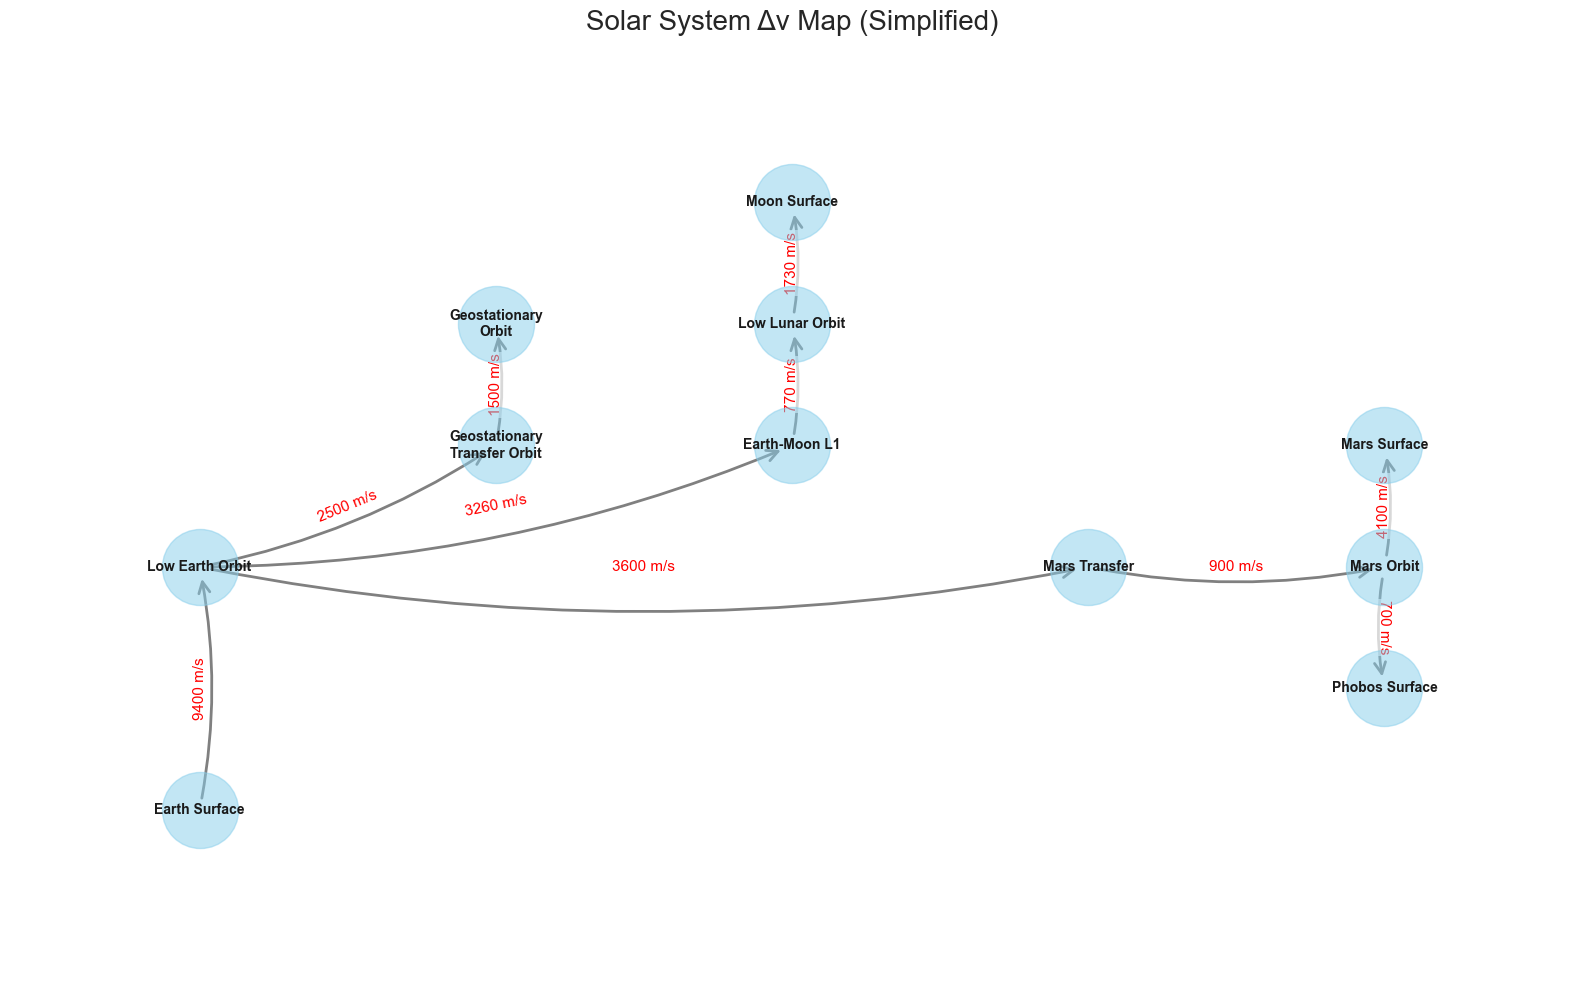

In [8]:
# 1. Create a Graph object
G = nx.DiGraph() # A DiGraph is a "Directed Graph", since travel A->B is not the same as B->A

# 2. Add the nodes and edges from our data structures
for node, attrs in solar_system_nodes.items():
    G.add_node(node, label=attrs['label'], pos=attrs['pos'])

for start, end, weight in solar_system_edges:
    G.add_edge(start, end, dv=weight)

# 3. Get positions and labels for plotting
pos = nx.get_node_attributes(G, 'pos')
node_labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'dv')

# 4. Create the plot using Matplotlib
plt.figure(figsize=(16, 10))
ax = plt.gca()
ax.set_title('Solar System Δv Map (Simplified)', fontsize=20)

# 5. Draw the graph components
# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.5)

# Draw the node labels
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Draw the edges
nx.draw_networkx_edges(G, pos,
                       edge_color='gray',
                       width=2,
                       arrowstyle='->',
                       arrowsize=20,
                       connectionstyle='arc3,rad=0.1') # Use arcs for clarity

# Draw the edge labels (the delta-v values)
nx.draw_networkx_edge_labels(G, pos,
                             edge_labels={k: f"{v} m/s" for k, v in edge_labels.items()},
                             font_color='red',
                             font_size=11,
                             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# 6. Customize and show the plot
plt.margins(0.1, 0.2) # Add some padding
plt.axis('off') # Hide the axes
plt.tight_layout()
plt.show()

### References and Further Reading

This notebook is an exploration based on foundational principles of astrodynamics and publicly available data. The following resources were used for theory, data collection, and visualization.

#### Books and Foundational Texts

*   **Curtis, Howard D. (2019). *Orbital Mechanics for Engineering Students* (4th ed.). Elsevier.**
    *   This is a comprehensive and highly recommended textbook for anyone familiar with basic physics. It provides detailed derivations for the rocket equation, orbital maneuvers, patched-conic approximations for interplanetary travel, and the theory behind Δv calculations.

*   **Bate, R. R., Mueller, D. D., & White, J. E. (1971). *Fundamentals of Astrodynamics*. Dover Publications.**
    *   A classic, foundational text in the field. It offers exceptionally clear explanations of orbital mechanics and is the source from which many modern texts and engineers have learned.

*   **Tsiolkovsky, Konstantin E. (1903). "The Exploration of Cosmic Space by Means of Reaction Devices" (Исследование мировых пространств реактивными приборами).** [archive.org](https://archive.org/details/nasa_techdoc_19750021068)
    *   The original scientific work where the rocket equation was first derived. This paper laid the theoretical groundwork for all subsequent rocketry.

### Data Sources and Methodology

The data used in this notebook is based on publicly available information. The following sections detail the sources for each data point and the methodology used for simplification, allowing for verification.

#### Rocket Specifications Data (`rockets_dataset.csv`)

| Rocket | Primary Data Source (Link) | Notes on Simplification and Data Selection |
| :--- | :--- | :--- |
| **V2 Rocket** | [Wikipedia: V-2 rocket](https://en.wikipedia.org/wiki/V-2_rocket) | As a single-stage rocket, the data is straightforward. `mf` is the burnout weight. |
| **R-7 (Vostok 8K72K)** | [Wikipedia: Vostok-K](https://en.wikipedia.org/wiki/Vostok-K) | `mf` is the burnout mass of the Block-E upper stage. |
| **Mercury-Redstone** | [Wikipedia: Mercury-Redstone Launch Vehicle](https://en.wikipedia.org/wiki/Mercury-Redstone_Launch_Vehicle) | A single-stage vehicle derived from the Redstone missile. |
| **Mercury-Atlas** | [Wikipedia: Atlas LV-3B](https://en.wikipedia.org/wiki/Atlas_LV-3B) | Uses a unique "stage-and-a-half" design. `mf` is the mass of the sustainer core after booster engine jettison. |
| **Saturn V** | [Wikipedia: Saturn V](https://en.wikipedia.org/wiki/Saturn_V) | `m0` is the total Apollo/Saturn V stack. `mf` is the burnout mass of the S-IVB (third stage). |
| **N1** | [Wikipedia: N1 (rocket)](https://en.wikipedia.org/wiki/N1_(rocket)) | Soviet moon rocket. `mf` is the burnout mass of the Block V (third stage). |
| **Space Shuttle** | [Wikipedia: Space Shuttle](https://en.wikipedia.org/wiki/Space_Shuttle) | A complex system. `m0` is total stack mass (Orbiter+Tank+SRBs). `mf` is the inert mass of the Orbiter (~104t), as its own engines and the external tank provide the final push to orbit. |
| **Ariane 5 ECA** | [Arianespace: Ariane 5 User's Manual](https://courses.edx.org/asset-v1:DelftX+AEASM1x+1T2022+type@asset+block/Ariane5_Users-Manual_October2016_Red.pdf) | `mf` is the dry mass of the ESC-A (cryogenic upper stage). |
| **Proton-M** | [Wikipedia: Proton-M](https://en.wikipedia.org/wiki/Proton-M) | `mf` is the burnout mass of the Briz-M upper stage. |
| **Soyuz-FG** | [Wikipedia: Soyuz-FG](https://en.wikipedia.org/wiki/Soyuz-FG) | `mf` is the burnout mass of the Block-I third stage. |
| **Long March 5** | [Wikipedia: Long March 5](https://en.wikipedia.org/wiki/Long_March_5) | `mf` is the dry mass of the YF-75D powered second stage. |
| **PSLV** | [ISRO: PSLV Brochure](https://www.isro.gov.in/media_isro/pdf/pslv_brochure.pdf) | `mf` is the dry mass of the PS4 (fourth stage). |
| **Falcon 9 (expendable)** | [SpaceX: Falcon 9](https://www.spacex.com/vehicles/falcon-9/) & [Wikipedia](https://en.wikipedia.org/wiki/Falcon_9) | Data for expendable mode. `mf` is the burnout mass of the second stage. |
| **Starship (Full Stack)** | [SpaceX: Starship](https://www.spacex.com/vehicles/starship/) & [Wikipedia](https://en.wikipedia.org/wiki/SpaceX_Starship) | Figures are based on publicly stated design goals from SpaceX. `mf` is the estimated dry mass of the Starship upper stage. |

#### Solar System Δv Map Data

The Δv map is a conceptual model, not a set of absolute physical constants. The values represent the change in velocity required for specific, efficient orbital maneuvers (like Hohmann transfers). The numbers can vary based on the exact trajectory, timing (planetary alignment), and desired speed of travel.

The values used in this notebook are standard, community-accepted figures derived from such models.

*   **Primary Visual Reference:** The layout and values are based on widely-circulated Δv maps, such as this popular version found on [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Delta-Vs_for_inner_Solar_System.svg).
*   **Theoretical Foundation:** The calculation of these values is a core topic in astrodynamics, derived using the principles of orbital energy and patched-conic approximations. A complete "first-principles" verification of these numbers would involve the methods detailed in the textbooks referenced above, particularly **Howard D. Curtis's *Orbital Mechanics for Engineering Students***.